### Counting the area of each precicnts


In [1]:
import pandas as pd
import geopandas as gpd
import requests
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import os
os.chdir("/Users/georgetarasenko/Desktop")

In [2]:
uiks = gpd.read_file('precincts 2.csv')
uiks

,WKT,uik_num,geometry
0,MULTIPOLYGON (((37.6394881292253 55.7604339625...,3609,"MULTIPOLYGON (((37.63949 55.76043, 37.63992 55..."
1,MULTIPOLYGON (((37.6588401996722 55.7208825668...,1760,"MULTIPOLYGON (((37.65884 55.72088, 37.65884 55..."
2,MULTIPOLYGON (((37.5357475280762 55.6930999755...,2766,"MULTIPOLYGON (((37.53575 55.69310, 37.53005 55..."
3,MULTIPOLYGON (((37.4158025193555 55.8049238578...,3035,"MULTIPOLYGON (((37.41580 55.80492, 37.41449 55..."
4,MULTIPOLYGON (((37.5727283899914 55.5508455427...,2429,"MULTIPOLYGON (((37.57273 55.55085, 37.57268 55..."
...,...,...,...
3483,MULTIPOLYGON (((37.2078991961766 55.6004329222...,2541,"MULTIPOLYGON (((37.20790 55.60043, 37.20640 55..."
3484,MULTIPOLYGON (((37.1479989948522 55.5917884799...,3315,"MULTIPOLYGON (((37.14800 55.59179, 37.14899 55..."
3485,MULTIPOLYGON (((37.1547605507634 55.6041895911...,3312,"MULTIPOLYGON (((37.15476 55.60419, 37.15499 55..."
3486,MULTIPOLYGON (((37.1622797836057 55.6050212243...,3313,"MULTIPOLYGON (((37.16228 55.60502, 37.16624 55..."


In [3]:
uiks['area'] = uiks['geometry'].area * (10**4)

In [4]:
import matplotlib.pyplot as plt

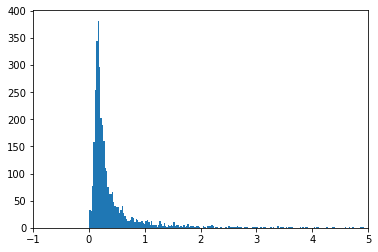

In [5]:
plt.hist(uiks['geometry'].area * (10**4), bins = 10000)
plt.xlim((-1,5))
plt.show()


In [6]:
uiks_area = uiks[['uik_num', 'area']]

In [7]:
uiks_area

,uik_num,area
0,3609,0.004644
1,1760,0.280523
2,2766,4.033332
3,3035,1.427584
4,2429,1.451777
...,...,...
3483,2541,5.616386
3484,3315,7.868016
3485,3312,3.136428
3486,3313,0.537760


In [8]:
uiks_area.to_csv('uiks_area.csv', index=False)

In [9]:
key = "8b0f6933e3802aff7a46c80e08227d15"
resp = requests.get("https://apidata.mos.ru/version")
d = resp.json()
d['Version'] 

1

In [10]:
buses = pd.read_csv('busstops.csv', error_bad_lines=False, sep=';',encoding='latin1')

In [11]:
buses_short = buses[['ID', 'Longitude_WGS84', 'Latitude_WGS84']]
buses_short

,ID,Longitude_WGS84,Latitude_WGS84
0,7,37.6551636,55.72566817
1,11,37.57240854,55.74944352
2,12,37.57271647,55.74976112
3,27,37.37550932,55.7572642
4,33,37.60337594,55.79289095
...,...,...,...
11860,6241,37.71787001,55.79639691
11861,14882,37.71766268,55.7964534
11862,3642,37.74723758,55.78667955
11863,7110,37.73489068,55.81294664


In [12]:
buses_short_geo = gpd.GeoDataFrame(buses_short, geometry=gpd.points_from_xy(pd.to_numeric(buses_short['Longitude_WGS84'],errors='coerce'), 
                                                                          pd.to_numeric(buses_short['Latitude_WGS84'],errors='coerce')))

In [13]:
prec_file = "precincts 2.csv"
uiks = gpd.read_file(prec_file)

In [14]:
buses_w_uiks = gpd.sjoin(buses_short_geo, uiks, op="within")
buses_w_uiks.head(40)
buses_w_uiks['bus_stations'] = 1

In [15]:
buses_w_uiks = buses_w_uiks[['uik_num', 'bus_stations']]
buses_w_uiks.to_csv('buses_w_uiks.csv', index=False)

In [16]:
covid_cases = pd.read_csv('/Users/georgetarasenko/Desktop/virus/mash/covidadress_upd (2).csv')
covid_cases_short = covid_cases[0:97]
covid_cases_short1 = covid_cases[0:138]
covid_cases_short2 = covid_cases[0:180]
covid_cases_short3 = covid_cases[0:244]
covid_cases_short4 = covid_cases[0:216]
covid_cases_short5 = covid_cases[0:423]
covid_cases_short6= covid_cases[0:640]
covid_cases_short7 = covid_cases[0:744]
covid_cases_short8 = covid_cases[0:877]
covid_cases_short9 = covid_cases[0:996]


In [17]:
covid_cases_short

,Unnamed: 0,Улица,Дом,Дата,adress,lonlat
0,1,Алтуфьевское шоссе,30В,24.03.2020,"Алтуфьевское шоссе , 30В",37.589033 55.865884
1,2,Бауманская,26,24.03.2020,"Бауманская , 26",37.677751 55.774234
2,3,2-я улица Марьиной Рощи,12,24.03.2020,"2-я улица Марьиной Рощи , 12",37.619441 55.795889
3,4,Белозёрская,11а,24.03.2020,"Белозёрская , 11а",37.615623 55.898069
4,5,2-я Филёвская,6,24.03.2020,"2-я Филёвская , 6",37.493632 55.736265
...,...,...,...,...,...,...
92,93,Шереметьевская,27,24.03.2020,"Шереметьевская , 27",37.614689 55.803322
93,94,Шмитовский проезд,16,24.03.2020,"Шмитовский проезд , 16",37.549238 55.758443
94,95,Шоссейная,50,24.03.2020,"Шоссейная , 50",37.721858 55.679377
95,96,Щелковское шоссе,98/57,24.03.2020,"Щелковское шоссе , 98/57",37.828173 55.812165


In [18]:
#covid_cases_short = covid_cases_short.explode('lonlat').reset_index(drop=True)
#covid_cases_short[['long', 'lat']] = covid_cases_short['lonlat'].apply(pd.Series)
covid_cases_short['lon'], covid_cases_short['lat'] = covid_cases_short['lonlat'].str.split(' ', 1).str
covid_cases_short = gpd.GeoDataFrame(covid_cases_short, geometry=gpd.points_from_xy(covid_cases_short['lon'].astype(float), covid_cases_short['lat'].astype(float)))


covid_cases_short1['lon'], covid_cases_short1['lat'] = covid_cases_short1['lonlat'].str.split(' ', 1).str
covid_cases_short1 = gpd.GeoDataFrame(covid_cases_short1, geometry=gpd.points_from_xy(covid_cases_short1['lon'].astype(float), covid_cases_short1['lat'].astype(float)))

covid_cases_short2['lon'], covid_cases_short2['lat'] = covid_cases_short2['lonlat'].str.split(' ', 1).str
covid_cases_short2 = gpd.GeoDataFrame(covid_cases_short2, geometry=gpd.points_from_xy(covid_cases_short2['lon'].astype(float), covid_cases_short2['lat'].astype(float)))
                                      
covid_cases_short3['lon'], covid_cases_short3['lat'] = covid_cases_short3['lonlat'].str.split(' ', 1).str
covid_cases_short3 = gpd.GeoDataFrame(covid_cases_short3, geometry=gpd.points_from_xy(covid_cases_short3['lon'].astype(float), covid_cases_short3['lat'].astype(float)))                            

covid_cases_short4['lon'], covid_cases_short4['lat'] = covid_cases_short4['lonlat'].str.split(' ', 1).str
covid_cases_short4 = gpd.GeoDataFrame(covid_cases_short4, geometry=gpd.points_from_xy(covid_cases_short4['lon'].astype(float), covid_cases_short4['lat'].astype(float)))

covid_cases_short5['lon'], covid_cases_short5['lat'] = covid_cases_short5['lonlat'].str.split(' ', 1).str
covid_cases_short5 = gpd.GeoDataFrame(covid_cases_short5, geometry=gpd.points_from_xy(covid_cases_short5['lon'].astype(float), covid_cases_short5['lat'].astype(float)))

covid_cases_short6['lon'], covid_cases_short6['lat'] = covid_cases_short6['lonlat'].str.split(' ', 1).str
covid_cases_short6 = gpd.GeoDataFrame(covid_cases_short6, geometry=gpd.points_from_xy(covid_cases_short6['lon'].astype(float), covid_cases_short6['lat'].astype(float)))

covid_cases_short7['lon'], covid_cases_short7['lat'] = covid_cases_short7['lonlat'].str.split(' ', 1).str
covid_cases_short7 = gpd.GeoDataFrame(covid_cases_short7, geometry=gpd.points_from_xy(covid_cases_short7['lon'].astype(float), covid_cases_short7['lat'].astype(float)))


covid_cases_short8['lon'], covid_cases_short8['lat'] = covid_cases_short8['lonlat'].str.split(' ', 1).str
covid_cases_short8 = gpd.GeoDataFrame(covid_cases_short8, geometry=gpd.points_from_xy(covid_cases_short8['lon'].astype(float), covid_cases_short8['lat'].astype(float)))


covid_cases_short9['lon'], covid_cases_short9['lat'] = covid_cases_short9['lonlat'].str.split(' ', 1).str
covid_cases_short9 = gpd.GeoDataFrame(covid_cases_short9, geometry=gpd.points_from_xy(covid_cases_short9['lon'].astype(float), covid_cases_short9['lat'].astype(float)))
                                      
                                      
                                      
                                      


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  import sys
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [19]:
uiks['centroid'] = uiks['geometry'].centroid

In [20]:
uiks['closest_case_dist'] = uiks['centroid'].apply(lambda x: covid_cases_short['geometry'].distance(x).min())
uiks['closest_case_dist1'] = uiks['centroid'].apply(lambda x: covid_cases_short1['geometry'].distance(x).min())
uiks['closest_case_dist2'] = uiks['centroid'].apply(lambda x: covid_cases_short2['geometry'].distance(x).min())
uiks['closest_case_dist3'] = uiks['centroid'].apply(lambda x: covid_cases_short3['geometry'].distance(x).min())
uiks['closest_case_dist4'] = uiks['centroid'].apply(lambda x: covid_cases_short4['geometry'].distance(x).min())
uiks['closest_case_dist5'] = uiks['centroid'].apply(lambda x: covid_cases_short5['geometry'].distance(x).min())
uiks['closest_case_dist6'] = uiks['centroid'].apply(lambda x: covid_cases_short6['geometry'].distance(x).min())
uiks['closest_case_dist7'] = uiks['centroid'].apply(lambda x: covid_cases_short7['geometry'].distance(x).min())
uiks['closest_case_dist8'] = uiks['centroid'].apply(lambda x: covid_cases_short8['geometry'].distance(x).min())
uiks['closest_case_dist9'] = uiks['centroid'].apply(lambda x: covid_cases_short9['geometry'].distance(x).min())

KeyboardInterrupt: 

In [ ]:
uiks['closest_case_mean'] = uiks['centroid'].apply(lambda x: covid_cases_short['geometry'].distance(x).mean())
uiks['closest_case_mean1'] = uiks['centroid'].apply(lambda x: covid_cases_short1['geometry'].distance(x).mean())
uiks['closest_case_mean2'] = uiks['centroid'].apply(lambda x: covid_cases_short2['geometry'].distance(x).mean())
uiks['closest_case_mean3'] = uiks['centroid'].apply(lambda x: covid_cases_short3['geometry'].distance(x).mean())
uiks['closest_case_mean4'] = uiks['centroid'].apply(lambda x: covid_cases_short4['geometry'].distance(x).mean())
uiks['closest_case_mean5'] = uiks['centroid'].apply(lambda x: covid_cases_short5['geometry'].distance(x).mean())
uiks['closest_case_mean6'] = uiks['centroid'].apply(lambda x: covid_cases_short6['geometry'].distance(x).mean())
uiks['closest_case_mean7'] = uiks['centroid'].apply(lambda x: covid_cases_short7['geometry'].distance(x).mean())
uiks['closest_case_mean8'] = uiks['centroid'].apply(lambda x: covid_cases_short8['geometry'].distance(x).mean())
uiks['closest_case_mean9'] = uiks['centroid'].apply(lambda x: covid_cases_short9['geometry'].distance(x).mean())
uiks

In [ ]:
uiks.to_csv('uiks_closest.csv', index=False)

## Attempts of clustering

In [69]:
import matplotlib.pyplot as plt
from kneed import KneeLocator

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [70]:
covid_cases = pd.read_csv('/Users/georgetarasenko/Desktop/virus/mash/covidadress_upd (2).csv')
covid_cases_short = covid_cases[0:97]
covid_cases_short1 = covid_cases[0:138]
covid_cases_short2 = covid_cases[0:180]
covid_cases_short3 = covid_cases[0:244]
covid_cases_short4 = covid_cases[0:216]
covid_cases_short5 = covid_cases[0:423]
covid_cases_short6= covid_cases[0:640]
covid_cases_short7 = covid_cases[0:744]
covid_cases_short8 = covid_cases[0:877]
covid_cases_short9 = covid_cases[0:996]

In [71]:
#covid_cases_short = covid_cases_short.explode('lonlat').reset_index(drop=True)
#covid_cases_short[['long', 'lat']] = covid_cases_short['lonlat'].apply(pd.Series)
covid_cases_short['lon'], covid_cases_short['lat'] = covid_cases_short['lonlat'].str.split(' ', 1).str
covid_cases_short = gpd.GeoDataFrame(covid_cases_short, geometry=gpd.points_from_xy(covid_cases_short['lon'].astype(float), covid_cases_short['lat'].astype(float)))


covid_cases_short1['lon'], covid_cases_short1['lat'] = covid_cases_short1['lonlat'].str.split(' ', 1).str
covid_cases_short1 = gpd.GeoDataFrame(covid_cases_short1, geometry=gpd.points_from_xy(covid_cases_short1['lon'].astype(float), covid_cases_short1['lat'].astype(float)))

covid_cases_short2['lon'], covid_cases_short2['lat'] = covid_cases_short2['lonlat'].str.split(' ', 1).str
covid_cases_short2 = gpd.GeoDataFrame(covid_cases_short2, geometry=gpd.points_from_xy(covid_cases_short2['lon'].astype(float), covid_cases_short2['lat'].astype(float)))
                                      
covid_cases_short3['lon'], covid_cases_short3['lat'] = covid_cases_short3['lonlat'].str.split(' ', 1).str
covid_cases_short3 = gpd.GeoDataFrame(covid_cases_short3, geometry=gpd.points_from_xy(covid_cases_short3['lon'].astype(float), covid_cases_short3['lat'].astype(float)))                            

covid_cases_short4['lon'], covid_cases_short4['lat'] = covid_cases_short4['lonlat'].str.split(' ', 1).str
covid_cases_short4 = gpd.GeoDataFrame(covid_cases_short4, geometry=gpd.points_from_xy(covid_cases_short4['lon'].astype(float), covid_cases_short4['lat'].astype(float)))

covid_cases_short5['lon'], covid_cases_short5['lat'] = covid_cases_short5['lonlat'].str.split(' ', 1).str
covid_cases_short5 = gpd.GeoDataFrame(covid_cases_short5, geometry=gpd.points_from_xy(covid_cases_short5['lon'].astype(float), covid_cases_short5['lat'].astype(float)))

covid_cases_short6['lon'], covid_cases_short6['lat'] = covid_cases_short6['lonlat'].str.split(' ', 1).str
covid_cases_short6 = gpd.GeoDataFrame(covid_cases_short6, geometry=gpd.points_from_xy(covid_cases_short6['lon'].astype(float), covid_cases_short6['lat'].astype(float)))

covid_cases_short7['lon'], covid_cases_short7['lat'] = covid_cases_short7['lonlat'].str.split(' ', 1).str
covid_cases_short7 = gpd.GeoDataFrame(covid_cases_short7, geometry=gpd.points_from_xy(covid_cases_short7['lon'].astype(float), covid_cases_short7['lat'].astype(float)))


covid_cases_short8['lon'], covid_cases_short8['lat'] = covid_cases_short8['lonlat'].str.split(' ', 1).str
covid_cases_short8 = gpd.GeoDataFrame(covid_cases_short8, geometry=gpd.points_from_xy(covid_cases_short8['lon'].astype(float), covid_cases_short8['lat'].astype(float)))


covid_cases_short9['lon'], covid_cases_short9['lat'] = covid_cases_short9['lonlat'].str.split(' ', 1).str
covid_cases_short9 = gpd.GeoDataFrame(covid_cases_short9, geometry=gpd.points_from_xy(covid_cases_short9['lon'].astype(float), covid_cases_short9['lat'].astype(float)))
                                      
                    

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  import sys
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

### 24 марта

In [109]:
scaler = StandardScaler()
scaled_features = covid_cases_short
scaled_features['lon'] = scaled_features ['lon'].astype(float)
scaled_features ['lat'] = scaled_features ['lat'].astype(float)
scaled_features  = scaled_features[scaled_features.lat < 56.0]
scaled_features  = scaled_features[scaled_features.lat > 55.0]
scaled_features  = scaled_features[scaled_features.lon < 38.2]
scaled_features  = scaled_features[scaled_features.lon > 37.0]
scaled_features  = scaled_features[scaled_features.lat < (scaled_features['lat'].mean() + 3*scaled_features['lat'].std())]
scaled_features  = scaled_features[scaled_features.lat > (scaled_features['lat'].mean() - 3*scaled_features['lat'].std())]
scaled_features  = scaled_features[scaled_features.lon < (scaled_features['lon'].mean() + 3*scaled_features['lon'].std())]
scaled_features  = scaled_features[scaled_features.lon > (scaled_features['lon'].mean() - 3*scaled_features['lon'].std())]
scaled_features = (scaled_features[['lon', 'lat']].dropna())

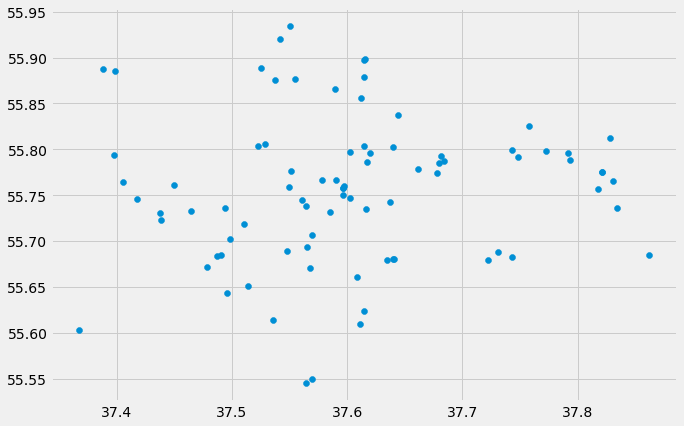

In [110]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(scaled_features['lon'],scaled_features['lat'], label='True Position')


plt.show()

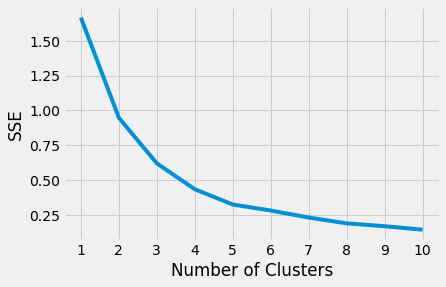

In [111]:
kmeans_kwargs = { "init": "random", "n_init": 10, "max_iter": 300, "random_state": 42,
   }
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

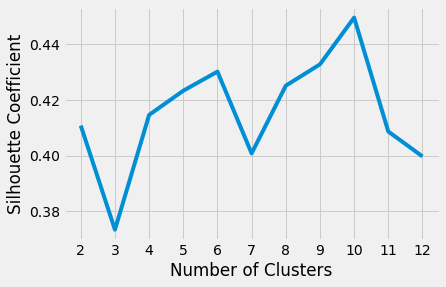

In [112]:
silhouette_coefficients = []

for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 13), silhouette_coefficients)
plt.xticks(range(2, 13))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [113]:
kmeans = KMeans(init="random",
                n_clusters=10,
                n_init=100,
                max_iter=10000,
                random_state=42)
kmeans.fit(scaled_features)
y_kmeans = kmeans.predict(scaled_features)

In [114]:
print(kmeans.fit(scaled_features),
kmeans.inertia_,
kmeans.cluster_centers_,)

KMeans(init='random', max_iter=10000, n_clusters=10, n_init=100,
       random_state=42) 0.14336512364329387 [[37.5753973  55.8892004 ]
 [37.73203567 55.68328333]
 [37.39466467 55.85563767]
 [37.80175531 55.77734692]
 [37.556493   55.56915433]
 [37.64648908 55.79024533]
 [37.51355136 55.68570036]
 [37.62483217 55.655266  ]
 [37.42585643 55.72270186]
 [37.57550644 55.75660012]]


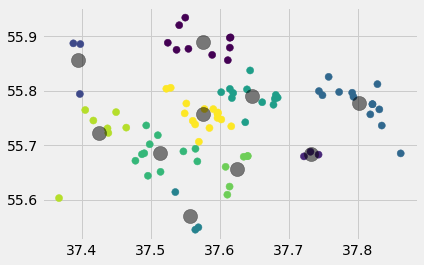

In [78]:
plt.scatter(scaled_features['lon'], scaled_features['lat'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [79]:
cluster_centroids_24mar =  pd.DataFrame(kmeans.cluster_centers_, columns = ['lon', 'lat'])
cluster_centroids_24mar

,lon,lat
0,37.575397,55.889200
1,37.732036,55.683283
2,37.394665,55.855638
3,37.801755,55.777347
4,37.556493,55.569154
5,37.646489,55.790245
6,37.513551,55.685700
7,37.624832,55.655266
8,37.425856,55.722702
9,37.575506,55.756600


### 28 марта

In [103]:
scaler = StandardScaler()
scaled_features = covid_cases_short4
scaled_features['lon'] = scaled_features ['lon'].astype(float)
scaled_features ['lat'] = scaled_features ['lat'].astype(float)
scaled_features  = scaled_features[scaled_features.lat < 56.0]
scaled_features  = scaled_features[scaled_features.lat > 55.0]
scaled_features  = scaled_features[scaled_features.lon < 38.2]
scaled_features  = scaled_features[scaled_features.lon > 37.0]
scaled_features  = scaled_features[scaled_features.lat < (scaled_features['lat'].mean() + 3*scaled_features['lat'].std())]
scaled_features  = scaled_features[scaled_features.lat > (scaled_features['lat'].mean() - 3*scaled_features['lat'].std())]
scaled_features  = scaled_features[scaled_features.lon < (scaled_features['lon'].mean() + 3*scaled_features['lon'].std())]
scaled_features  = scaled_features[scaled_features.lon > (scaled_features['lon'].mean() - 3*scaled_features['lon'].std())]
scaled_features = (scaled_features[['lon', 'lat']].dropna())

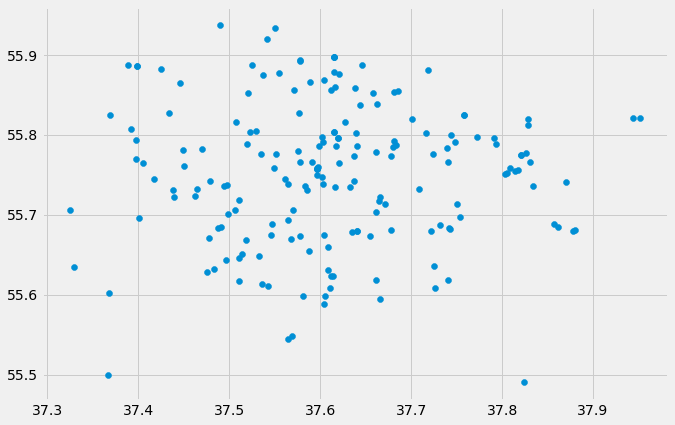

In [104]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(scaled_features['lon'],scaled_features['lat'], label='True Position')


plt.show()

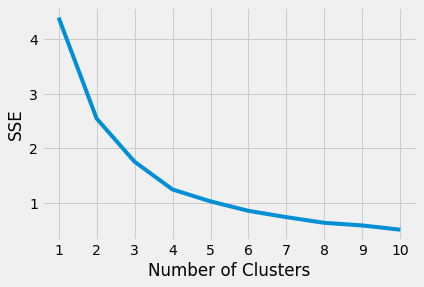

In [105]:
kmeans_kwargs = { "init": "random", "n_init": 10, "max_iter": 300, "random_state": 42,
   }
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

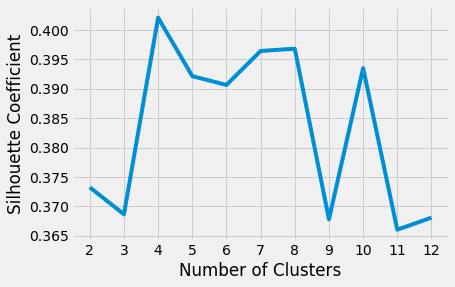

In [106]:
silhouette_coefficients = []

for k in range(2, 13):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 13), silhouette_coefficients)
plt.xticks(range(2, 13))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [107]:
kmeans = KMeans(init="random",
                n_clusters=4,
                n_init=100,
                max_iter=10000,
                random_state=42)
kmeans.fit(scaled_features)
y_kmeans = kmeans.predict(scaled_features)

In [108]:
print(kmeans.fit(scaled_features),
kmeans.inertia_,
kmeans.cluster_centers_,)

KMeans(init='random', max_iter=10000, n_clusters=4, n_init=100, random_state=42) 1.2463966524189067 [[37.607137   55.81051959]
 [37.79345639 55.7399459 ]
 [37.4236663  55.77201259]
 [37.56365316 55.64649784]]


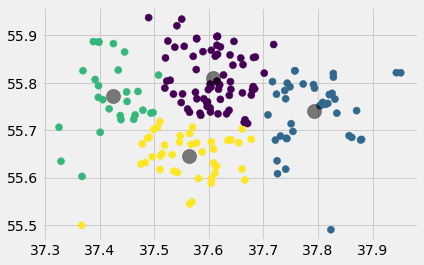

In [86]:
plt.scatter(scaled_features['lon'], scaled_features['lat'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [87]:
cluster_centroids_28mar =  pd.DataFrame(kmeans.cluster_centers_, columns = ['lon', 'lat'])

### 2 апреля

In [88]:
scaler = StandardScaler()
scaled_features = covid_cases_short9
scaled_features['lon'] = scaled_features ['lon'].astype(float)
scaled_features ['lat'] = scaled_features ['lat'].astype(float)
scaled_features  = scaled_features[scaled_features.lat < 56.0]
scaled_features  = scaled_features[scaled_features.lat > 55.0]
scaled_features  = scaled_features[scaled_features.lon < 38.2]
scaled_features  = scaled_features[scaled_features.lon > 37.0]
scaled_features  = scaled_features[scaled_features.lat < (scaled_features['lat'].mean() + 3*scaled_features['lat'].std())]
scaled_features  = scaled_features[scaled_features.lat > (scaled_features['lat'].mean() - 3*scaled_features['lat'].std())]
scaled_features  = scaled_features[scaled_features.lon < (scaled_features['lon'].mean() + 3*scaled_features['lon'].std())]
scaled_features  = scaled_features[scaled_features.lon > (scaled_features['lon'].mean() - 3*scaled_features['lon'].std())]
scaled_features = (scaled_features[['lon', 'lat']].dropna())

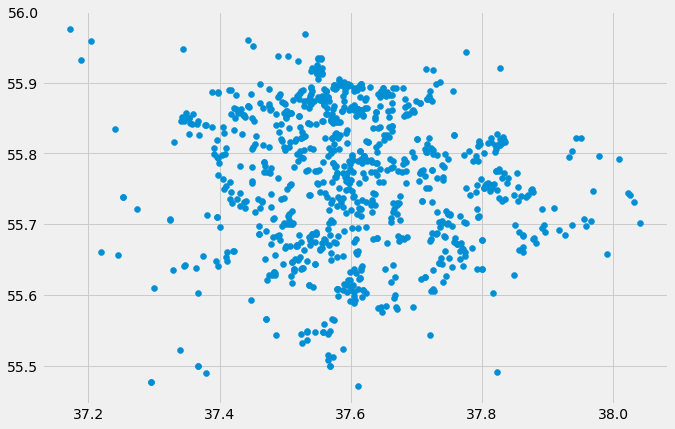

In [89]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(scaled_features['lon'],scaled_features['lat'], label='True Position')


plt.show()

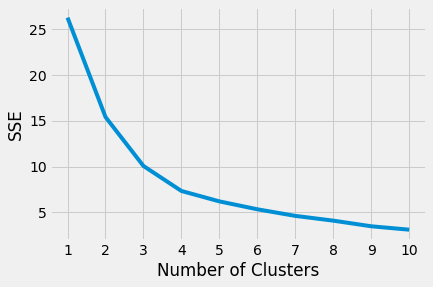

In [90]:
kmeans_kwargs = { "init": "random", "n_init": 10, "max_iter": 300, "random_state": 42,
   }
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

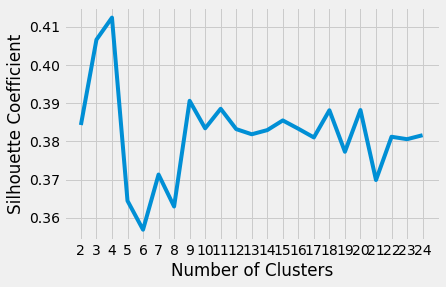

In [91]:
silhouette_coefficients = []

for k in range(2, 25):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 25), silhouette_coefficients)
plt.xticks(range(2, 25))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [92]:
kmeans = KMeans(init="random",
                n_clusters=4,
                n_init=100,
                max_iter=10000,
                random_state=42)
kmeans.fit(scaled_features)
y_kmeans = kmeans.predict(scaled_features)

In [93]:
print(kmeans.fit(scaled_features),
kmeans.inertia_,
kmeans.cluster_centers_,)

KMeans(init='random', max_iter=10000, n_clusters=4, n_init=100, random_state=42) 7.325263208857019 [[37.41346266 55.79311482]
 [37.79731292 55.73186618]
 [37.56233524 55.64707013]
 [37.59542313 55.84489748]]


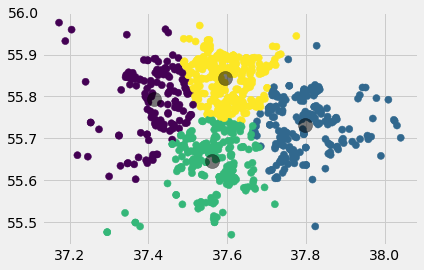

In [94]:
plt.scatter(scaled_features['lon'], scaled_features['lat'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [95]:
cluster_centroids_2apr =  pd.DataFrame(kmeans.cluster_centers_, columns = ['lon', 'lat'])
cluster_centroids_2apr

,lon,lat
0,37.413463,55.793115
1,37.797313,55.731866
2,37.562335,55.647070
3,37.595423,55.844897


In [96]:
cluster_centroids_28mar
cluster_centroids_24mar.reset_index(inplace=True)
cluster_centroids_28mar.reset_index(inplace=True)
cluster_centroids_2apr.reset_index(inplace=True)
cluster_centroids_28mar

,index,lon,lat
0,0,37.607137,55.810520
1,1,37.793456,55.739946
2,2,37.423666,55.772013
3,3,37.563653,55.646498


In [97]:
cluster_centroids_28mar

,index,lon,lat
0,0,37.607137,55.810520
1,1,37.793456,55.739946
2,2,37.423666,55.772013
3,3,37.563653,55.646498


In [98]:

cluster_centroids_24mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   10 non-null     int64  
 1   lon     10 non-null     float64
 2   lat     10 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 368.0 bytes


In [99]:
#cluster_centroids_24mar['lon']= cluster_centroids_24mar['lon'].str.split(' ', 1).str
#cluster_centroids_24mar['lat'] = cluster_centroids_24mar['lat'].str.split(' ', 1).str
cluster_centroids_24mar= gpd.GeoDataFrame(cluster_centroids_24mar, geometry=gpd.points_from_xy(cluster_centroids_24mar['lon'].astype(float), cluster_centroids_24mar['lat'].astype(float)))


cluster_centroids_28mar = gpd.GeoDataFrame(cluster_centroids_28mar, geometry=gpd.points_from_xy(cluster_centroids_28mar['lon'].astype(float), cluster_centroids_28mar['lat'].astype(float)))
cluster_centroids_2apr = gpd.GeoDataFrame(cluster_centroids_2apr, geometry=gpd.points_from_xy(cluster_centroids_2apr['lon'].astype(float), cluster_centroids_2apr['lat'].astype(float)))

uiks['closest_cluster_24mar_dist'] = uiks['centroid'].apply(lambda x: cluster_centroids_24mar['geometry'].distance(x).min())
uiks['closest_cluster_28mar_dist'] = uiks['centroid'].apply(lambda x: cluster_centroids_28mar['geometry'].distance(x).min())
uiks['closest_cluster_2apr_dist'] = uiks['centroid'].apply(lambda x: cluster_centroids_2apr['geometry'].distance(x).min())

In [115]:
uiks.to_csv('uiks_instrument.csv', index=False)